In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
import xlrd

In [5]:
book = xlrd.open_workbook('./fire_theft.xls',encoding_override='utf-8')
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
m = sheet.nrows-1

In [6]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

In [11]:
w = tf.Variable(0., name='w')
b = tf.Variable(0., name='b')
print(m)

42


In [12]:
yhat = X*w + b
loss = tf.square(Y - yhat, name='loss')
train = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())    
    losses = []
    for i in range(100):
        total_loss = 0.0
        for x, y in data:
            _, l = sess.run([train, loss], feed_dict = {X:x, Y:y})
            total_loss += l
        print("epoch {0}: {1}".format(i, total_loss/m))
        losses.append(total_loss/m)
    w, b = sess.run([w, b])

epoch 0: 2069.6319333978354
epoch 1: 2117.0123581953535
epoch 2: 2092.302723001866
epoch 3: 2068.5080461938464
epoch 4: 2045.591184088162
epoch 5: 2023.5146448101316
epoch 6: 2002.2447619835536
epoch 7: 1981.748338803649
epoch 8: 1961.9944411260742
epoch 9: 1942.9520116143283
epoch 10: 1924.5930823644712
epoch 11: 1906.8898800636332
epoch 12: 1889.8164505837929
epoch 13: 1873.347133841543
epoch 14: 1857.4588400604468
epoch 15: 1842.1278742424079
epoch 16: 1827.332495119955
epoch 17: 1813.0520579712022
epoch 18: 1799.2660847636982
epoch 19: 1785.9562132299961
epoch 20: 1773.1024853109072
epoch 21: 1760.689129482884
epoch 22: 1748.6984157081515
epoch 23: 1737.1138680398553
epoch 24: 1725.920873066732
epoch 25: 1715.1046249579008
epoch 26: 1704.6500954309377
epoch 27: 1694.5447134910141
epoch 28: 1684.7746311347667
epoch 29: 1675.328450968245
epoch 30: 1666.1935385839038
epoch 31: 1657.3584002084322
epoch 32: 1648.8122658529207
epoch 33: 1640.5440742547091
epoch 34: 1632.5446836102221
epo

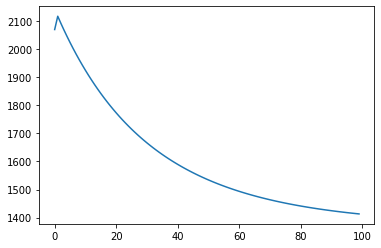

In [15]:
x1 = range(100)
x2 = losses

plt.plot(x1, x2)
plt.show()

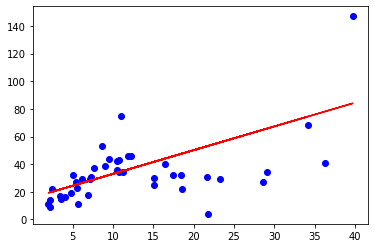

In [16]:
x1 = data.T[0]
x2 = data.T[1]
yhat = x1*w + b

plt.plot(x1, x2, 'bo')
plt.plot(x1, yhat, 'r')
plt.show()